In [1]:
## R code 2.1
ways <- c( 0 , 3 , 8 , 9 , 0 )
ways/sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

In [2]:
## R code 2.2
dbinom( 6 , size=9 , prob=0.5 )

[1] 0.1640625

In [3]:
## R code 2.3
# define grid
p_grid <- seq( from=0 , to=1 , length.out=20 )

# define prior
prior <- rep( 1 , 20 )

# compute likelihood at each value in grid
likelihood <- dbinom( 6 , size=9 , prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

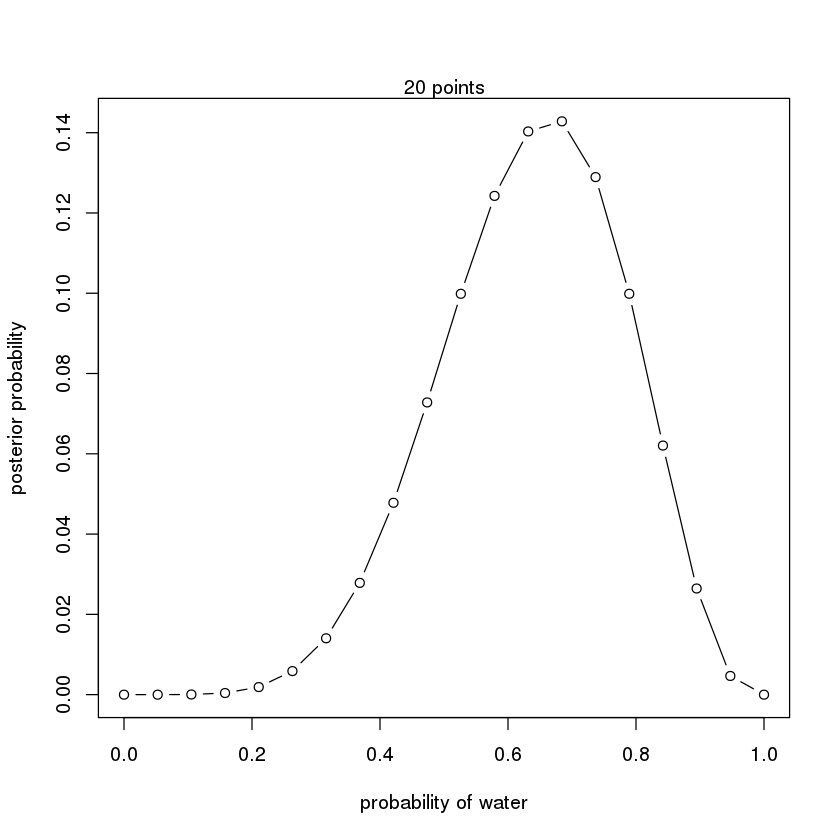

In [4]:
## R code 2.4
plot( p_grid , posterior , type="b" ,
    xlab="probability of water" , ylab="posterior probability" )
mtext( "20 points" )

In [5]:
## R code 2.5
prior <- ifelse( p_grid < 0.5 , 0 , 1 )
prior <- exp( -5*abs( p_grid - 0.5 ) )

In [6]:
## R code 2.6
library(rethinking)
globe.qa <- map(
    alist(
        w ~ dbinom(9,p) ,  # binomial likelihood
        p ~ dunif(0,1)     # uniform prior
    ) ,
    data=list(w=6) )

# display summary of quadratic approximation
precis( globe.qa )

Loading required package: rstan
Loading required package: ggplot2
rstan (Version 2.9.0, packaged: 2016-01-05 16:17:47 UTC, GitRev: 05c3d0058b6a)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.58)


  Mean StdDev 5.5% 94.5%
p 0.67   0.16 0.42  0.92

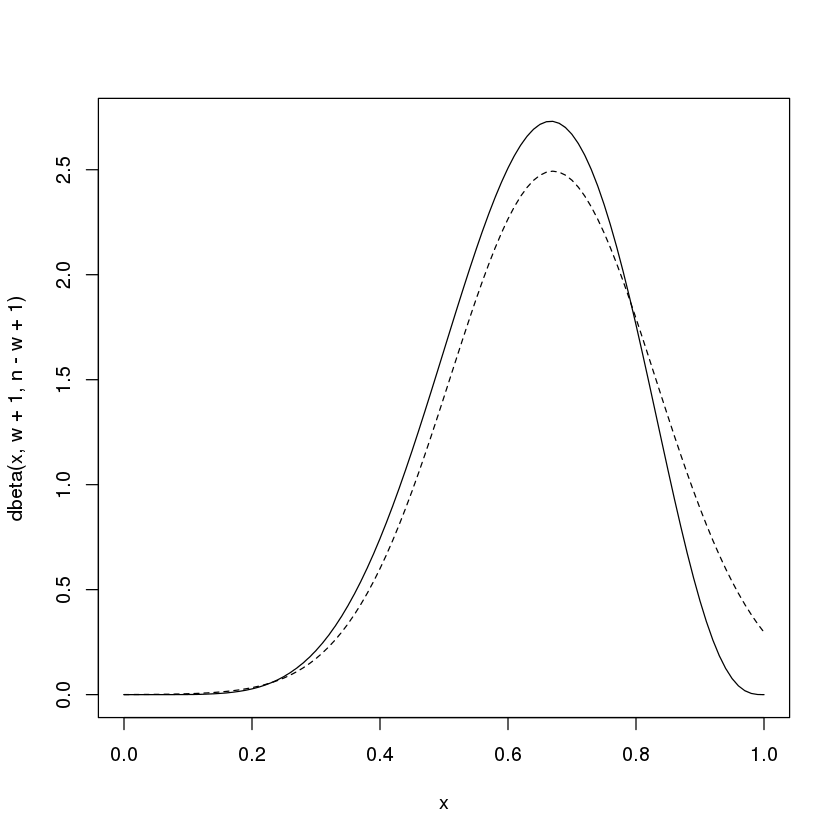

In [7]:
## R code 2.7
# analytical calculation
w <- 6
n <- 9
curve( dbeta( x , w+1 , n-w+1 ) , from=0 , to=1 )
# quadratic approximation
curve( dnorm( x , 0.67 , 0.16 ) , lty=2 , add=TRUE )